In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sonar.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df = shuffle(df)
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
52,0.0293,0.0378,0.0257,0.0062,0.0130,0.0612,0.0895,0.1107,0.0973,0.0751,...,0.0065,0.0072,0.0108,0.0051,0.0102,0.0041,0.0055,0.0050,0.0087,R
69,0.0065,0.0122,0.0068,0.0108,0.0217,0.0284,0.0527,0.0575,0.1054,0.1109,...,0.0069,0.0025,0.0027,0.0052,0.0036,0.0026,0.0036,0.0006,0.0035,R
87,0.0274,0.0242,0.0621,0.0560,0.1129,0.0973,0.1823,0.1745,0.1440,0.1808,...,0.0113,0.0108,0.0085,0.0047,0.0074,0.0104,0.0161,0.0220,0.0173,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
101,0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,...,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124,M


In [5]:
dataset = df.values
print(dataset)


[[0.0293 0.0378 0.0257 ... 0.005 0.0087 'R']
 [0.0065 0.0122 0.0068 ... 0.0006 0.0035 'R']
 [0.0274 0.0242 0.0621 ... 0.022 0.0173 'R']
 ...
 [0.0195 0.0213 0.0058 ... 0.0021 0.0053 'R']
 [0.0192 0.0607 0.0378 ... 0.0112 0.0075 'R']
 [0.0253 0.0808 0.0507 ... 0.0081 0.0053 'R']]


In [6]:
dataset.shape

(207, 61)

In [7]:
x = dataset[:,:60].astype('float32')
y = dataset[:,60]
print(x[0])
print(y[0])

[0.0293 0.0378 0.0257 0.0062 0.013  0.0612 0.0895 0.1107 0.0973 0.0751
 0.0528 0.1209 0.1763 0.2039 0.2727 0.2321 0.2676 0.2934 0.3295 0.491
 0.5402 0.6257 0.6826 0.7527 0.8504 0.8938 0.9928 0.9134 0.708  0.6318
 0.6126 0.4638 0.2797 0.1721 0.1665 0.2561 0.2735 0.3209 0.2724 0.188
 0.1552 0.2522 0.2121 0.1801 0.1473 0.0681 0.1091 0.0919 0.0397 0.0093
 0.0076 0.0065 0.0072 0.0108 0.0051 0.0102 0.0041 0.0055 0.005  0.0087]
R


In [8]:
le = LabelEncoder()
encoded_y = le.fit_transform(y)
encoded_y

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1])

In [9]:
train_data = x[:145,:]
train_labels = encoded_y[:145]
test_data = x[145:,:]
test_labels = encoded_y[145:]
print('Train Data: ',train_data.shape)
print('Test Data: ',test_data.shape)

Train Data:  (145, 60)
Test Data:  (62, 60)


In [10]:
model = models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [12]:
model.fit(train_data, train_labels, epochs=40, batch_size=2)

Train on 145 samples
Epoch 1/40
145/145 [==============================] - 2s 16ms/sample - loss: 0.6771 - acc: 0.5931
Epoch 2/40
145/145 [==============================] - 1s 5ms/sample - loss: 0.6497 - acc: 0.6069
Epoch 3/40
145/145 [==============================] - 1s 4ms/sample - loss: 0.6198 - acc: 0.6207
Epoch 4/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.5846 - acc: 0.7655
Epoch 5/40
145/145 [==============================] - 1s 4ms/sample - loss: 0.5770 - acc: 0.7103
Epoch 6/40
145/145 [==============================] - 1s 4ms/sample - loss: 0.5489 - acc: 0.7310
Epoch 7/40
145/145 [==============================] - 1s 4ms/sample - loss: 0.5267 - acc: 0.7862
Epoch 8/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.5051 - acc: 0.7517
Epoch 9/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.4963 - acc: 0.7931
Epoch 10/40
145/145 [==============================] - 1s 4ms/sample - loss: 0.4787 - acc: 0.8069
Epoch 1

In [15]:
loss, acc = model.evaluate(test_data, test_labels, verbose=2)
print(acc)

41/1 - 0s - loss: 0.3529 - acc: 0.8049
0.80487806


# Training model with validation

In [21]:
train_data = x[:145,:]
train_labels = encoded_y[:145]
val_data = x[145:166,:]
val_labels = encoded_y[145:166]
test_data = x[166:,:]
test_labels = encoded_y[166:]

In [22]:
print('Train Data: ',train_data.shape)
print('Validation Data: ',val_data.shape)
print('Test Data:', test_data.shape)

Train Data:  (145, 60)
Validation Data:  (21, 60)
Test Data: (41, 60)


In [40]:
model = models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [41]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=4, validation_data=(val_data,val_labels))


Train on 145 samples, validate on 21 samples
Epoch 1/20
145/145 [==============================] - 1s 10ms/sample - loss: 0.7044 - acc: 0.4966 - val_loss: 0.6992 - val_acc: 0.4762
Epoch 2/20
145/145 [==============================] - 0s 3ms/sample - loss: 0.6508 - acc: 0.6069 - val_loss: 0.7082 - val_acc: 0.4762
Epoch 3/20
145/145 [==============================] - 0s 3ms/sample - loss: 0.6366 - acc: 0.6276 - val_loss: 0.6789 - val_acc: 0.5238
Epoch 4/20
145/145 [==============================] - 1s 4ms/sample - loss: 0.6218 - acc: 0.6207 - val_loss: 0.6591 - val_acc: 0.6190
Epoch 5/20
145/145 [==============================] - 1s 4ms/sample - loss: 0.6057 - acc: 0.7034 - val_loss: 0.6638 - val_acc: 0.6190
Epoch 6/20
145/145 [==============================] - 0s 3ms/sample - loss: 0.5887 - acc: 0.7103 - val_loss: 0.6094 - val_acc: 0.7143
Epoch 7/20
145/145 [==============================] - 0s 3ms/sample - loss: 0.5791 - acc: 0.7034 - val_loss: 0.6129 - val_acc: 0.6190
Epoch 8/20
145/1

In [26]:
his_dict = history.history

In [27]:
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = range(1,len(loss)+1)

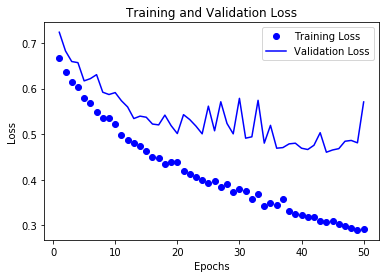

In [43]:

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

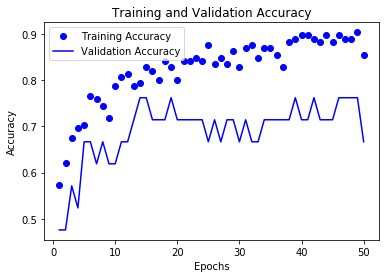

In [42]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [30]:
model.evaluate(test_data, test_labels)

41/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3472280422361886, 0.80487806]

# Appling k-Fold Validation


In [32]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [33]:
seed = 7
np.random.seed(seed)

In [35]:
def model():
    model = models.Sequential()
    model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [36]:
estimator = KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_labels, cv=kfold)

In [37]:
print("Results(Accuracy): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results(Accuracy): 80.62% (7.61%)


In [38]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, train_data, train_labels, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 82.10% (10.52%)
